In [ ]:
import pandas as pd

company = pd.read_csv('classified_data.csv', delimiter=',', index_col=0)
company.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
# Scaling the Feature

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(company.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scalar.transform(company.drop('TARGET CLASS', axis=1))
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [ ]:
df_feat = pd.DataFrame(scaled_features, columns=company.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [ ]:
# Train and Split

from sklearn.model_selection import train_test_split

x = scaled_features
y = company['TARGET CLASS']

X_train,x_test,Y_train,y_test = train_test_split(x,y, test_size=0.3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_predict = knn.predict(x_test)

In [ ]:
# Prediction and Model Evaluation
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       160
           1       0.91      0.96      0.93       140

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [ ]:
print(confusion_matrix(y_test, y_predict))

[[146  14]
 [  5 135]]


In [ ]:
# Choosing a k-value

accuracy_rate = []
error_rate = []

for x in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=x)
  score=cross_val_score(knn, df_feat,y,cv=10)
  accuracy_rate.append(score.mean())
  error_rate.append(1-score.mean())

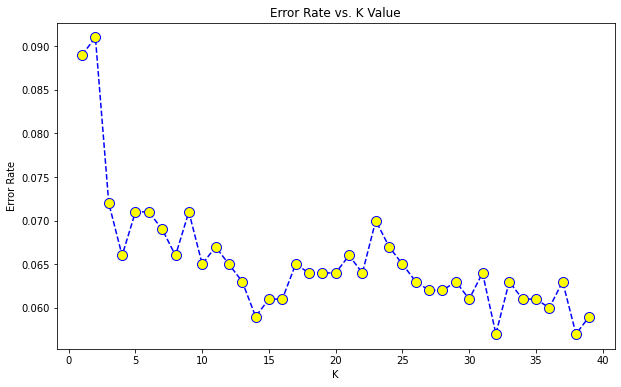

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Checking the Error Rate visually
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

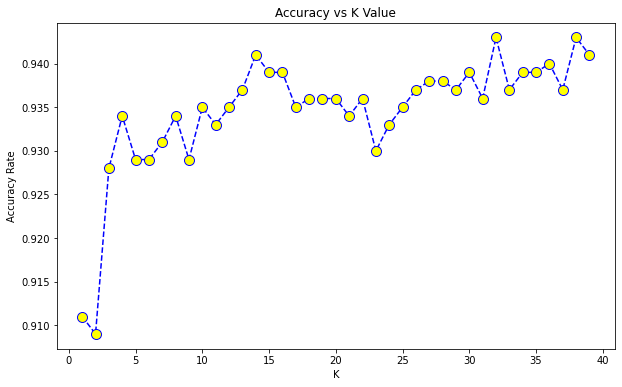

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), accuracy_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=10)
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

In [ ]:
''' 
  So above diagrm shows after k > 26 the accuracy will decently goes good and error is also decreasing.
  so i am selecting 29 is a k - value
'''


new_knn = KNeighborsClassifier(n_neighbors=29)
new_knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')

In [ ]:
y_predict = new_knn.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_predict))

[[142  18]
 [  1 139]]


In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       160
           1       0.89      0.99      0.94       140

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

